# Business Understanding

## Project Domain

Global Public Health and Environmental Monitoring

Proyek ini berada pada domain kesehatan masyarakat dan lingkungan global. Aplikasi Sejukin hadir sebagai solusi digital yang fokus pada pemantauan dan penyampaian informasi terkait kualitas udara secara real-time di berbagai wilayah di dunia. Aplikasi ini berperan dalam meningkatkan kesadaran masyarakat terhadap dampak polusi udara terhadap kesehatan.

## Problem Statements

🌫️ Kurangnya Akses Informasi Real-Time:
Banyak masyarakat tidak memiliki akses mudah terhadap informasi kualitas udara secara real-time di wilayah mereka.

🧠 Rendahnya Kesadaran Terhadap Dampak Polusi Udara:
Polusi udara masih dianggap isu sekunder oleh sebagian besar masyarakat, padahal dampaknya signifikan terhadap kesehatan, terutama bagi kelompok rentan.

📉 Minimnya Tindakan Preventif Kesehatan:
Tanpa informasi yang tepat, masyarakat cenderung tidak melakukan tindakan pencegahan seperti memakai masker, mengurangi aktivitas luar ruangan, atau menggunakan alat penjernih udara.

🌍 Kurangnya Integrasi Data Global:
Banyak aplikasi hanya mencakup wilayah tertentu, sedangkan kualitas udara adalah isu lintas negara yang memerlukan pemantauan skala global.

## Goals

*   Meningkatkan kesadaran terhadap dampak buruk polusi udara terhadap kesehatan.
*   Mendukung pengambilan keputusan yang lebih sehat dan aman dalam aktivitas sehari-hari

## Solution Statements

Sejukin adalah aplikasi yang mengintegrasikan data kualitas udara dari berbagai sumber terpercaya (seperti sensor lokal dan lembaga internasional) dan menyajikannya dalam antarmuka yang informatif dan mudah dipahami. Aplikasi ini dilengkapi dengan fitur kondisi udara, indeks kualitas udara (AQI), Dengan begitu, pengguna dapat lebih sadar dan waspada terhadap risiko polusi udara.

# Data Understanding

## Import data dari kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shandysatria","key":"0350b817060e310e468c505f1f5e0090"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [ ]:
!kaggle datasets download -d azminetoushikwasi/aqi-air-quality-index-scheduled-daily-update --force

Dataset URL: https://www.kaggle.com/datasets/azminetoushikwasi/aqi-air-quality-index-scheduled-daily-update
License(s): ODbL-1.0
  0% 0.00/86.6k [00:00<?, ?B/s]
100% 86.6k/86.6k [00:00<00:00, 140MB/s]


In [ ]:
!mkdir aqi-air-quality-index-scheduled-daily-update
!unzip aqi-air-quality-index-scheduled-daily-update.zip -d aqi-air-quality-index-scheduled-daily-update
!ls aqi-air-quality-index-scheduled-daily-update

Archive:  aqi-air-quality-index-scheduled-daily-update.zip
  inflating: aqi-air-quality-index-scheduled-daily-update/data_date.csv  
data_date.csv


## Import Library yang dibutuhkan

In [ ]:
!pip install pycountry

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 36.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

import plotly.express as px
import pycountry

import joblib

import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

## Exploratory Data Analysis

**Membaca Data Yang Berbentuk CSV**

In [ ]:
df = pd.read_csv('aqi-air-quality-index-scheduled-daily-update/data_date.csv')

**Memahami Struktur Data**

In [ ]:
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19519 entries, 0 to 19518
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       19519 non-null  object
 1   Country    19519 non-null  object
 2   Status     19519 non-null  object
 3   AQI Value  19519 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 610.1+ KB


,AQI Value
count,19519.000000
mean,63.404170
std,50.421534
min,1.000000
25%,29.000000
50%,53.000000
75%,83.000000
max,963.000000


In [ ]:
print(df.head())

         Date    Country                          Status  AQI Value
0  2022-07-21    Albania                            Good         14
1  2022-07-21    Algeria                        Moderate         65
2  2022-07-21    Andorra                        Moderate         55
3  2022-07-21     Angola  Unhealthy for Sensitive Groups        113
4  2022-07-21  Argentina                        Moderate         63


**Distribusi AQI**

<Axes: xlabel='AQI Value', ylabel='Count'>

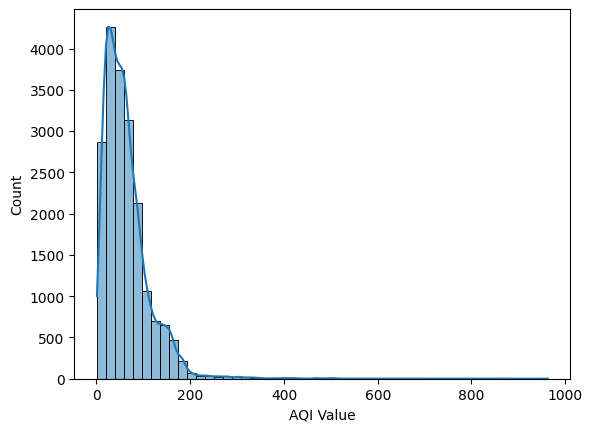

In [ ]:
sns.histplot(df['AQI Value'], bins=50, kde=True)

**Rata-rata AQI per Negara**

In [ ]:
df.groupby('Country')['AQI Value'].mean().sort_values(ascending=False)

,AQI Value
Country,
India,220.986395
China,177.632653
Iraq,155.134921
Qatar,154.546392
Iran,151.294521
...,...
Bermuda,13.723214
Puerto Rico,12.946429
Brunei,11.911565


**Tren Waktu**

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

<Axes: xlabel='Date'>

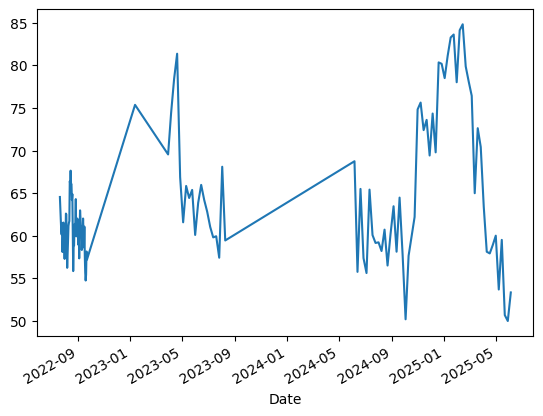

In [ ]:
df.groupby('Date')['AQI Value'].mean().plot()

**Kategori AQI**

<Axes: xlabel='Status'>

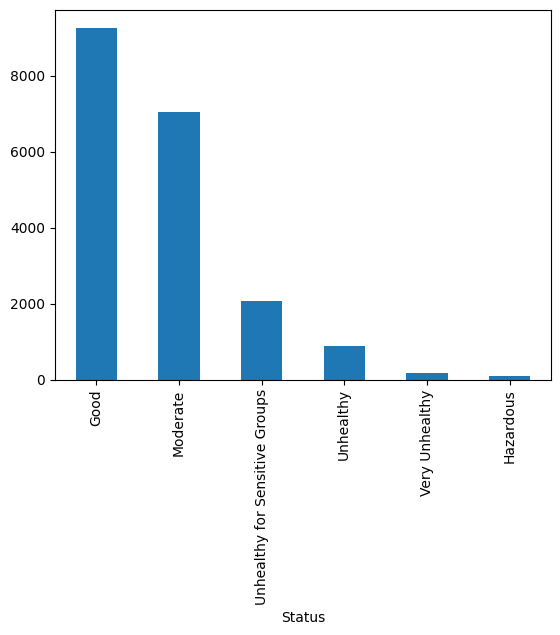

In [ ]:
df['Status'].value_counts().plot(kind='bar')

**Sebaran Peta Polusi Global teks tebal**

In [ ]:
df['Country'].unique()

array(['Albania', 'Algeria', 'Andorra', 'Angola', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh',
       'Belarus', 'Belgium', 'Belize', 'Bermuda', 'Bolivia',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Cambodia', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Costa Rica', 'Croatia', 'Cyprus',
       'Czech Republic', 'Denmark', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'Estonia', 'Ethiopia', 'Finland', 'France',
       'French Guiana', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana',
       'Gibraltar', 'Greece', 'Grenada', 'Guadeloupe', 'Guam',
       'Guatemala', 'Honduras', 'Hong Kong', 'Hungary', 'Iceland',
       'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Ivory Coast', 'Japan', 'Jersey', 'Jordan', 'Kazakhstan', 'Kenya',
       'Kosovo', 'Kuwait', 'Kyrgyzstan', 

In [ ]:
print(df.columns)

Index(['Date', 'Country', 'Status', 'AQI Value'], dtype='object')


In [ ]:
fig = px.scatter_geo(df, locations="Country",
                      locationmode="country names",
                      color="AQI Value", size="AQI Value",
                      projection="natural earth")
fig.show()

# Data Preparation

**Mengecek missing value**

In [ ]:
df.isnull().sum()

,0
Date,0
Country,0
Status,0
AQI Value,0


**Encode 'Country' dan 'Status'**

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [ ]:
# Encode Country
le_country = LabelEncoder()
df['Country_encoded'] = le_country.fit_transform(df['Country'])

In [ ]:
# Encode Status (target)
le_status = LabelEncoder()
df['Status_encoded'] = le_status.fit_transform(df['Status'])

**Fitur dan label**

In [ ]:
# Fitur dan target
X = df[['Year', 'Month', 'Day', 'Country_encoded', 'AQI Value']]
y = df['Status_encoded']

In [ ]:
# Scaling fitur
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# One-hot encode target (karena klasifikasi multi-kelas)
from tensorflow.keras.utils import to_categorical
y_categorical = to_categorical(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_categorical, test_size=0.2, random_state=42, stratify=y
)

# Modeling

**Train-Test Split**

**Modeling: ANN**

In [ ]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(y_categorical.shape[1], activation='softmax'))  # jumlah kelas sebagai output

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │           198 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,662 (10.40 KB)

 Trainable params: 2,662 (10.40 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2)

Epoch 1/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.4390 - loss: 1.3334 - val_accuracy: 0.5469 - val_loss: 1.0196
Epoch 2/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6274 - loss: 0.8704 - val_accuracy: 0.8822 - val_loss: 0.4422
Epoch 3/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8857 - loss: 0.3935 - val_accuracy: 0.9097 - val_loss: 0.2669
Epoch 4/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9335 - loss: 0.2449 - val_accuracy: 0.9558 - val_loss: 0.2010
Epoch 5/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9558 - loss: 0.1858 - val_accuracy: 0.9545 - val_loss: 0.1607
Epoch 6/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9603 - loss: 0.1564 - val_accuracy: 0.9769 - val_loss: 0.1312
Epoch 7/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9650 - loss: 0.1360 - val_accuracy: 0.9766 - val_loss: 0.1157
Epoch 8/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9682 - loss: 0.1206 - val_accuracy: 0.

# Evaluation

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\nAkurasi ANN pada data test: {accuracy:.4f}")

122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9821 - loss: 0.0473

Akurasi ANN pada data test: 0.9831


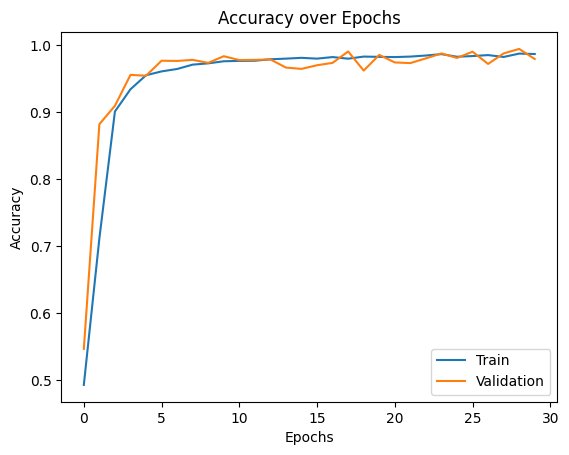

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Model Simulation

**Simulasi input**

In [ ]:
input_date = pd.to_datetime("2022-07-21")
input_country = "Albania"
input_aqi = 14

**Ekstrak tanggal**

In [ ]:
input_year = input_date.year
input_month = input_date.month
input_day = input_date.day

In [ ]:
# Encode negara
if input_country in le_country.classes_:
    country_encoded = le_country.transform([input_country])[0]
else:
    print("Negara tidak dikenali model.")
    country_encoded = 0  # fallback

In [ ]:
# Buat dataframe input
input_df = pd.DataFrame([[input_year, input_month, input_day, country_encoded, input_aqi]],
                        columns=['Year', 'Month', 'Day', 'Country_encoded', 'AQI Value'])

# Scale
input_scaled = scaler.transform(input_df)

# Prediksi
pred = model.predict(input_scaled)
pred_label = le_status.inverse_transform([np.argmax(pred)])[0]

print(f"\n🔍 Prediksi Status Udara: {pred_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step

🔍 Prediksi Status Udara: Good


## Save Model

**Simpan scaler**

In [ ]:
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

**Simpan label encoder untuk Country**

In [ ]:
joblib.dump(le_country, 'country_encoder.pkl')

['country_encoder.pkl']

**Simpan label encoder untuk Status**

In [ ]:
joblib.dump(le_status, 'status_encoder.pkl')

['status_encoder.pkl']

**Simpan model .h5 (standar Keras)**

In [ ]:
model.save('model_ann.h5')

**Konversi ke .tflite**

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

Saved artifact at '/tmp/tmpw06mgrxy'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 5), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 6), dtype=tf.float32, name=None)
Captures:
  132364146290768: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132364146278480: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132364146288464: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132364146291536: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132364146287504: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132364146287120: TensorSpec(shape=(), dtype=tf.resource, name=None)



**Simpan ke file**

In [ ]:
with open('model_ann.tflite', 'wb') as f:
    f.write(tflite_model)